#**Import Libraries**

In [540]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

#**Load Data**

In [541]:
df = pd.read_csv("/content/housing.csv")

In [542]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [544]:
df.dropna(inplace=True)

In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#**Train-Test Split**

In [546]:
x = df.drop(['median_house_value'],axis = 1)
y = df['median_house_value']

In [547]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [548]:
train_data = x_train.join(y_train)
test_data = x_test.join(y_test)

#**Data Exploration**

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

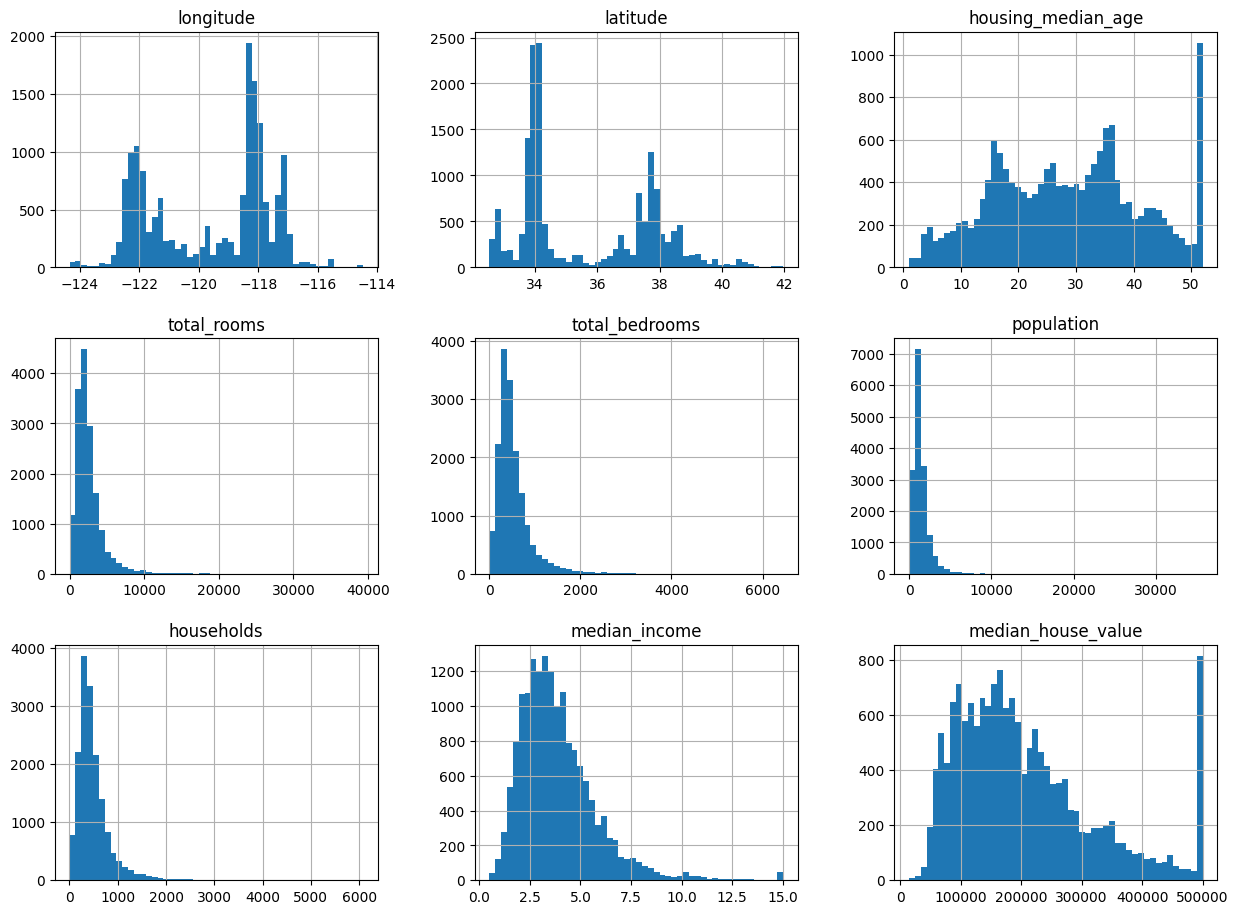

In [549]:
train_data.hist(bins=50, figsize=(15,15), layout=(4, 3))

<Axes: >

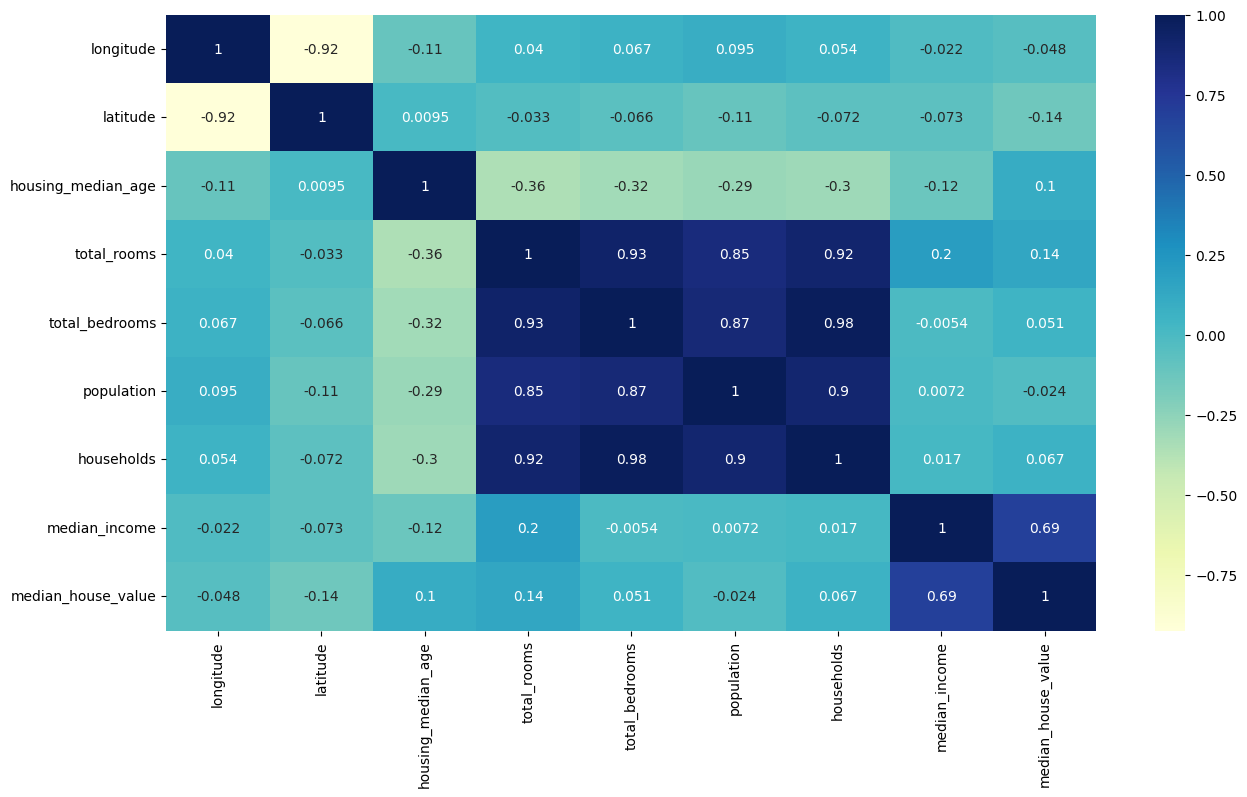

In [550]:
# Drop the 'ocean_proximity' column before calculating correlation
train_data_numeric = train_data.drop('ocean_proximity', axis=1)
plt.figure(figsize=(15, 8))
sns.heatmap(train_data_numeric.corr(), annot=True, cmap='YlGnBu')

#**Data PreProcessing**

In [551]:
train_data['total_rooms'] = np.log1p(train_data['total_rooms'])
train_data['total_bedrooms'] = np.log1p(train_data['total_bedrooms'])
train_data['population'] = np.log1p(train_data['population'])
train_data['households'] = np.log1p(train_data['households'])

test_data['total_rooms'] = np.log1p(test_data['total_rooms'])
test_data['total_bedrooms'] = np.log1p(test_data['total_bedrooms'])
test_data['population'] = np.log1p(test_data['population'])
test_data['households'] = np.log1p(test_data['households'])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

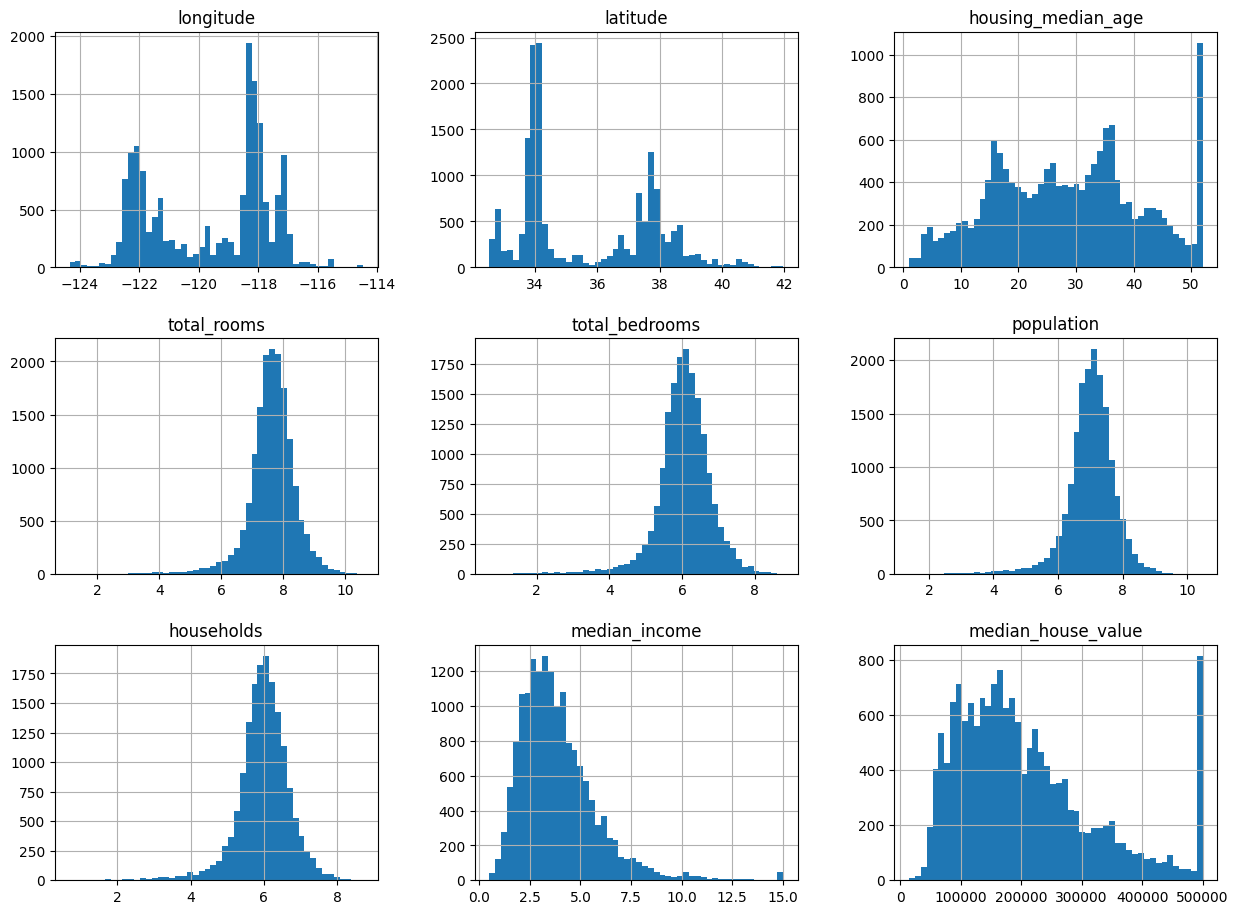

In [552]:
train_data.hist(bins=50, figsize=(15,15), layout=(4, 3))

In [553]:
train_data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,7231
INLAND,5156
NEAR OCEAN,2114
NEAR BAY,1842
ISLAND,3


In [554]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype=int)).drop('ocean_proximity',axis=1)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity,dtype=int)).drop('ocean_proximity',axis=1)

<Axes: >

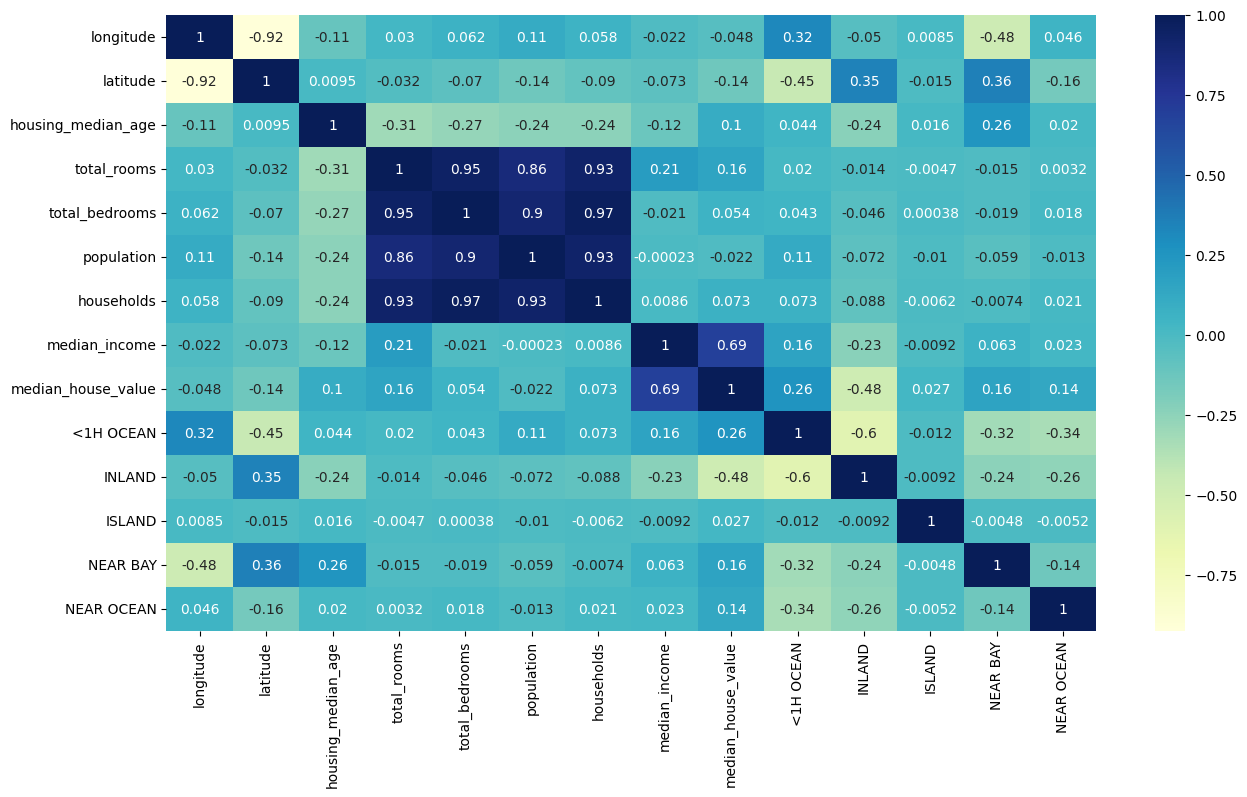

In [555]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='longitude', ylabel='latitude'>

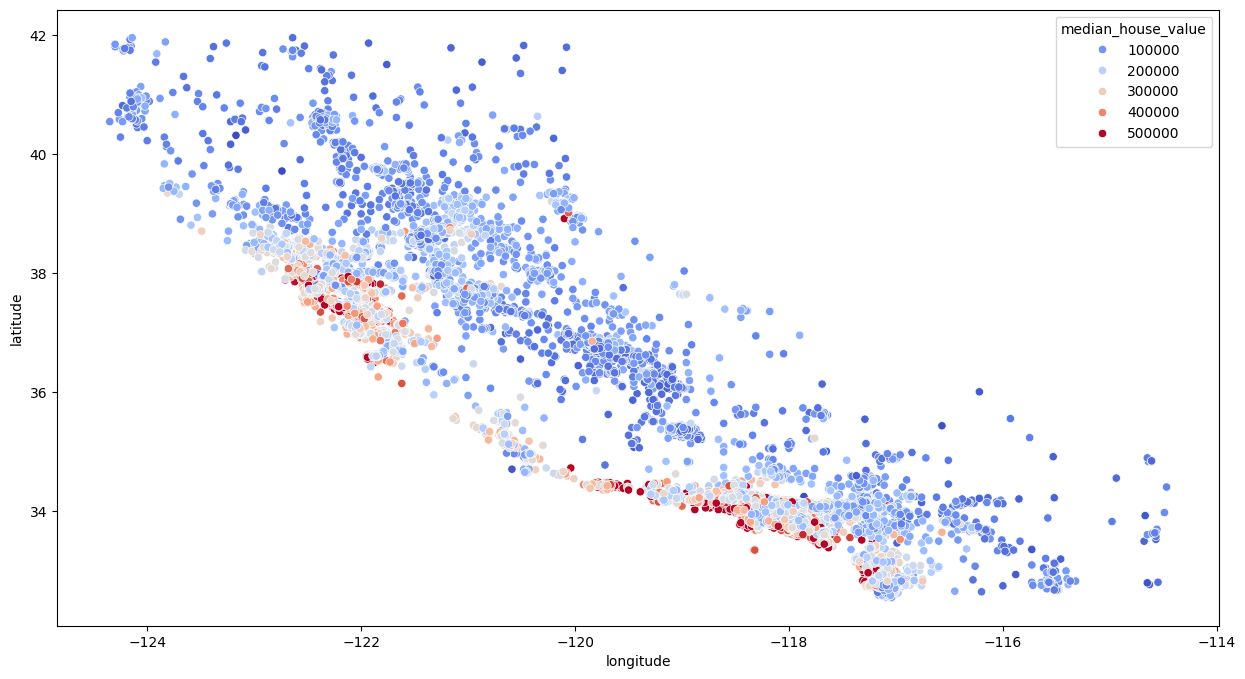

In [556]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='longitude',y='latitude',hue='median_house_value',data=train_data, palette='coolwarm')

#**Feature Engineering**

In [557]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

<Axes: >

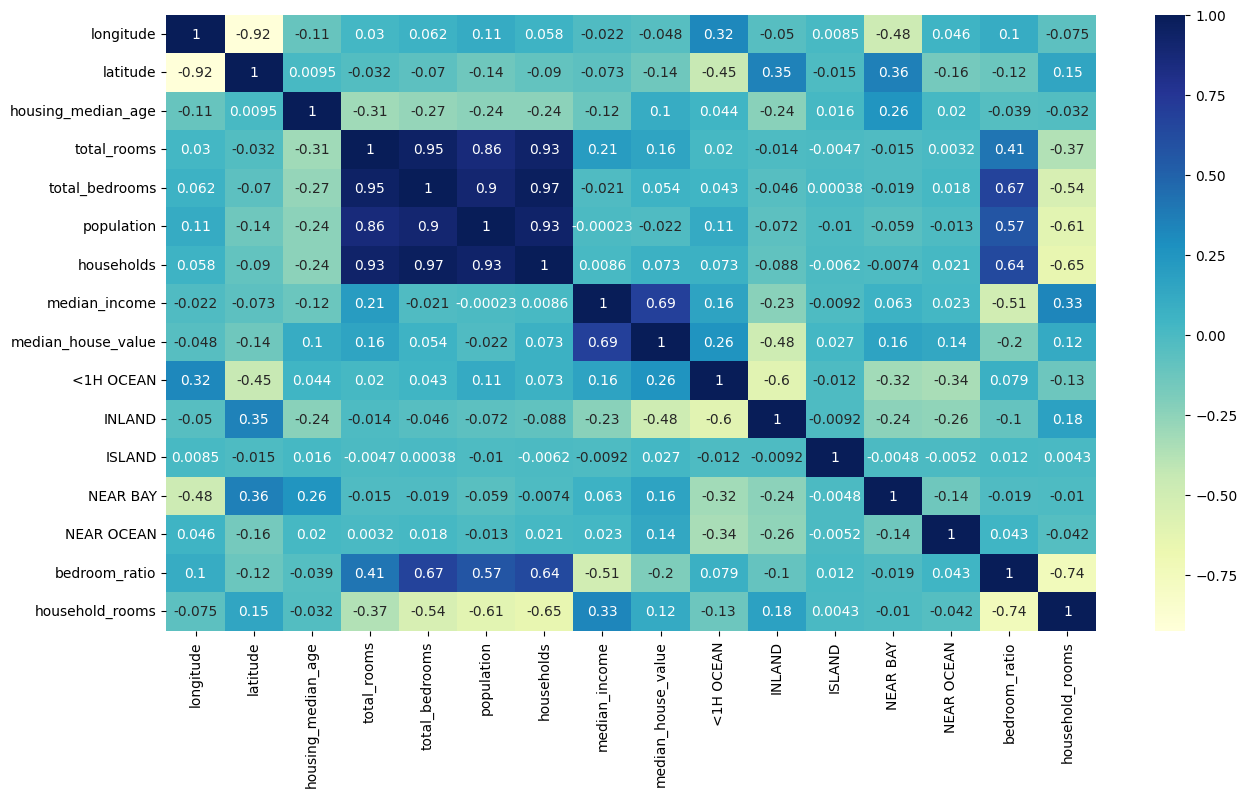

In [558]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

#**Linear Regression Model**

In [559]:
x_train , y_train = train_data.drop('median_house_value', axis=1), train_data['median_house_value']
x_test, y_test = test_data.drop('median_house_value', axis=1), test_data['median_house_value']

scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

In [560]:
# Linear Model
Lr = LinearRegression()
Lr.fit(x_train_s, y_train)

LinearRegression()

In [561]:
Lr.score(x_test_s,y_test)

0.6687407117584969

In [562]:
# Ridge Model
alphas = np.logspace(-6, 6, 50)

ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(x_train_s, y_train)

RidgeCV(alphas=array([1.00000000e-06, 1.75751062e-06, 3.08884360e-06, 5.42867544e-06,
       9.54095476e-06, 1.67683294e-05, 2.94705170e-05, 5.17947468e-05,
       9.10298178e-05, 1.59985872e-04, 2.81176870e-04, 4.94171336e-04,
       8.68511374e-04, 1.52641797e-03, 2.68269580e-03, 4.71486636e-03,
       8.28642773e-03, 1.45634848e-02, 2.55954792e-02, 4.49843267e-02,
       7.90604321e-02, 1.38949549e-0...
       7.54312006e-01, 1.32571137e+00, 2.32995181e+00, 4.09491506e+00,
       7.19685673e+00, 1.26485522e+01, 2.22299648e+01, 3.90693994e+01,
       6.86648845e+01, 1.20679264e+02, 2.12095089e+02, 3.72759372e+02,
       6.55128557e+02, 1.15139540e+03, 2.02358965e+03, 3.55648031e+03,
       6.25055193e+03, 1.09854114e+04, 1.93069773e+04, 3.39322177e+04,
       5.96362332e+04, 1.04811313e+05, 1.84206997e+05, 3.23745754e+05,
       5.68986603e+05, 1.00000000e+06]),
        cv=5)

In [563]:
ridge.score(x_test_s,y_test)

0.6687973845103201

In [564]:
# Lasso Model
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=20000, n_jobs=-1)
lasso_cv.fit(x_train_s, y_train)

LassoCV(alphas=array([1.00000000e-06, 1.75751062e-06, 3.08884360e-06, 5.42867544e-06,
       9.54095476e-06, 1.67683294e-05, 2.94705170e-05, 5.17947468e-05,
       9.10298178e-05, 1.59985872e-04, 2.81176870e-04, 4.94171336e-04,
       8.68511374e-04, 1.52641797e-03, 2.68269580e-03, 4.71486636e-03,
       8.28642773e-03, 1.45634848e-02, 2.55954792e-02, 4.49843267e-02,
       7.90604321e-02, 1.38949549e-0...
       7.19685673e+00, 1.26485522e+01, 2.22299648e+01, 3.90693994e+01,
       6.86648845e+01, 1.20679264e+02, 2.12095089e+02, 3.72759372e+02,
       6.55128557e+02, 1.15139540e+03, 2.02358965e+03, 3.55648031e+03,
       6.25055193e+03, 1.09854114e+04, 1.93069773e+04, 3.39322177e+04,
       5.96362332e+04, 1.04811313e+05, 1.84206997e+05, 3.23745754e+05,
       5.68986603e+05, 1.00000000e+06]),
        cv=5, max_iter=20000, n_jobs=-1)

In [565]:
lasso.score(x_test_s,y_test)

0.6688111677650848

In [ ]:
# Elastic Net
elastic_cv = ElasticNetCV(alphas=alphas, l1_ratio=[0.1,0.5,0.9], cv=5, max_iter=20000, n_jobs=-1)
elastic_cv.fit(x_train_s, y_train)

In [567]:
elastic_cv.score(x_test_s,y_test)

0.668800971649782

#**Random Forest Regression Model**

In [568]:
forest = RandomForestRegressor(random_state=42)
forest.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [569]:
forest.score(x_test, y_test)

0.8194040647914272

In [572]:
param_dist = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

rf_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=5, scoring="r2",cv=2,random_state=42, n_jobs=-1,verbose=2)

rf_search.fit(x_train, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


RandomizedSearchCV(cv=2,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='r2', verbose=2)

In [574]:
rf_search.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=200,
                      n_jobs=-1, random_state=42)

In [573]:
best_rf = rf_search.best_estimator_
best_rf.score(x_test, y_test)

0.8217033298562851